## Trabalho de Conclusão de Curso - TCC
#### Turma - DSA T212
#### Aluno : Drausio Gomes dos Santos
#### Orientadora: Gabrielle Maria Romeiro Lombardi
#### Tema: Construção e uso de modelos de grafos para representação e análise da estrutura organizacional da administração pública federal.
### Resultados Preliminares

### Etapa 8: Modelo de Regressão para avaliação do tempo de carga total


In [1]:
!pip install pyforest
!pip install dplython
!pip install plotnine
!pip install statstests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import time
import datetime as dt
from datetime import datetime
import pickle
import igraph as ig
from igraph import *
print("igraph : ",ig.__version__)
import pandas as pd
import pytz
import numpy as np

from pyforest import * 
from plotnine import * 
from dplython import * 
from scipy.stats import norm 
from scipy.stats.distributions import chi2 
from sklearn.preprocessing import PowerTransformer 

import statsmodels.api as sm 
import statsmodels.stats.diagnostic as dgn
import statsmodels.stats.stattools as stt
import statstests.tests as statt
import statsmodels.formula.api as smf 
import warnings 
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.special import boxcox, inv_boxcox

class Main:     
    def show_current_time(self):
        tz_SP = pytz.timezone('America/Sao_Paulo') 
        now = datetime.now(tz_SP)
        current_time = now.strftime("%d/%m/%Y %H:%M:%S")
        print("Current Time =", current_time)
        return now

main = Main()
    


igraph :  0.10.1


In [3]:
arquivo_dataframe = "dataframe_parcial_2019_2022_200000.pkl"
df_mr = pickle.load(open(arquivo_dataframe, "rb"))
df_mr
d50 = df_mr[df_mr.percentual_carga == 50.0]
d50

<IPython.core.display.Javascript object>

,tamanho_amostra,percentual_carga,tempo,tempo_em_horas
99,558114,50.0,1 days 08:00:45.342899,32.0


In [4]:
arquivo_dataframe = "dataframe_parcial_2019_2022_200000.pkl"
df_mr = pickle.load(open(arquivo_dataframe, "rb"))
d100 = df_mr[df_mr.percentual_carga == 100.0]
d100

<IPython.core.display.Javascript object>

,tamanho_amostra,percentual_carga,tempo,tempo_em_horas
199,558114,100.0,2 days 19:20:45.197985,67.333333


In [5]:
df_mr.describe()

,tamanho_amostra,percentual_carga,tempo,tempo_em_horas
count,270.000000,270.000000,270,270.000000
mean,561608.814815,41.824074,1 days 03:43:19.763316625,27.713395
std,5918.285175,29.150003,0 days 19:20:37.056986173,19.343287
min,558114.000000,0.500000,0 days 00:16:36.485303,0.266667
25%,558114.000000,17.125000,0 days 11:30:00.946008500,11.487500
50%,558114.000000,34.000000,0 days 23:25:38.344792,23.416667
75%,571594.000000,66.375000,1 days 19:29:54.145757250,43.491667
max,571594.000000,100.000000,2 days 19:20:45.197985,67.333333


<IPython.core.display.Javascript object>

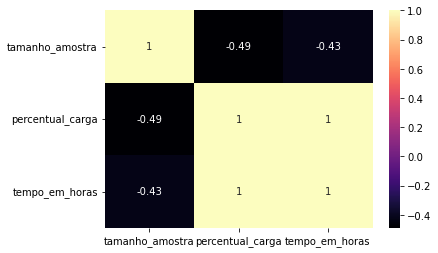

In [6]:

sns.heatmap(df_mr.corr(),annot=True,cmap = 'magma');

In [7]:
pd.set_option('display.max_columns', None) # coluna
pd.set_option('display.max_rows', None) # linha
df_mr_percentual_carga = df_mr[['percentual_carga','tamanho_amostra','tempo_em_horas']]
df_mr_percentual_carga

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,percentual_carga,tamanho_amostra,tempo_em_horas
0,0.5,558114,0.266667
1,1.0,558114,0.533333
2,1.5,558114,0.800000
3,2.0,558114,1.066667
4,2.5,558114,1.333333
5,3.0,558114,1.616667
6,3.5,558114,1.900000
7,4.0,558114,2.183333
8,4.5,558114,2.483333
9,5.0,558114,2.766667


In [8]:
X1 = df_mr_percentual_carga.drop(['tempo_em_horas'],axis=1)
#x1 = df_mr_percentual_carga['percentual_carga','tamanho_amostra']
y1 = df_mr_percentual_carga['tempo_em_horas']
modelo1 = (sm.OLS(y1,sm.add_constant(X1)).fit())
modelo1.summary(title='Sumário do modelo para cálculo do tempo de carga')

<class 'statsmodels.iolib.summary.Summary'>
"""
               Sumário do modelo para cálculo do tempo de carga               
==============================================================================
Dep. Variable:         tempo_em_horas   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.120e+05
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:05:52   Log-Likelihood:                -273.47
No. Observations:                 270   AIC:                             552.9
Df Residuals:                     267   BIC:                             563.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -144.8023      4.479    -32.330      0.000    -153.621    -135.984
percentual_carga     0.6871      0.002    427.528      0.000       0.684       0.690
tamanho_amostra      0.0003   7.92e-06     32.343      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.445   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.411
Skew:                           0.610   Prob(JB):                     3.70e-05
Kurtosis:                       3.570   Cond. No.                     6.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

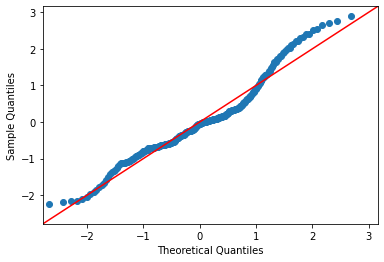

In [9]:
res1 = modelo1.resid
fig = sm.qqplot(res1, stats.norm, fit=True, line="45")
plt.show()

In [10]:
valores_test = dgn.kstest_normal(res1, dist='norm', pvalmethod='table')
print('teste Kolmogorov-Smirnov para dist normal | (pvalue)', valores_test[1])
valores_test_jb = stt.jarque_bera(res1)
print('teste Jarque-Bera        para dist normal | (pvalue)', valores_test_jb[1])
print('--------------------------------------------------')
statt.shapiro_francia(res1)


teste Kolmogorov-Smirnov para dist normal | (pvalue) 0.0009999999999998899
teste Jarque-Bera        para dist normal | (pvalue) 3.695737152495664e-05
--------------------------------------------------
method  :  Shapiro-Francia normality test
statistics W  :  0.959371161323629
statistics z  :  4.526813900070084
p-value  :  2.993981409180336e-06


{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.959371161323629,
 'statistics z': 4.526813900070084,
 'p-value': 2.993981409180336e-06}

In [11]:
print("Previsão do tempo de carga modelo regressão linear")

import math

ypred = modelo1.params.const +  modelo1.params.tamanho_amostra * 558114 + modelo1.params.percentual_carga * 100
print('100% -- ','|ypred -- ',ypred) 

ypred = modelo1.params.const +  modelo1.params.tamanho_amostra * 558114 + modelo1.params.percentual_carga * 50
print('50%  -- ','|ypred -- ',ypred) 



Previsão do tempo de carga modelo regressão linear
100% --  |ypred --  66.78988709486083
50%  --  |ypred --  32.43614797109697


Transformação BOX-COX


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Valor de Lambda: 0.47695594700634664
[-0.98045003 -0.54312649 -0.2116793   0.06554211  0.30835328  0.5398505
  0.75094366  0.94612579  1.13883029  1.30992742  1.48136958  1.63539901
  1.78275323  1.91604092  2.04464145  2.16900476  2.3043229   2.43522502
  2.55515681  2.67855344  2.7919667   2.90898781  3.02308302  3.12833658
  3.23730445  3.33802308  3.43673518  3.52790829  3.6230365   3.72190483
  3.82964115  3.93003793  4.03377434  4.13562053  4.23567343  4.334022
  4.42594916  4.52120403  4.61497856  4.71191971  4.79834221  4.8880481
  4.97211381  5.05509719  5.13703784  5.22220559  5.30630012  5.38935987
  5.47142108  5.55654802  5.63666697  5.71588583  5.79812844  5.87944207
  5.95604733  6.02808934  6.09943754  6.17011104  6.24012809  6.30587032
  6.37105324  6.43926573  6.50688561  6.57392764  6.64040596  6.70633415
  6.77515227  6.84338991  6.91106109  6.97483633  7.04144122  7.10751795
  7.17307852  7.23489352  7.29948048  7.36039034  7.420873    7.48093706
  7.54371932  7.60

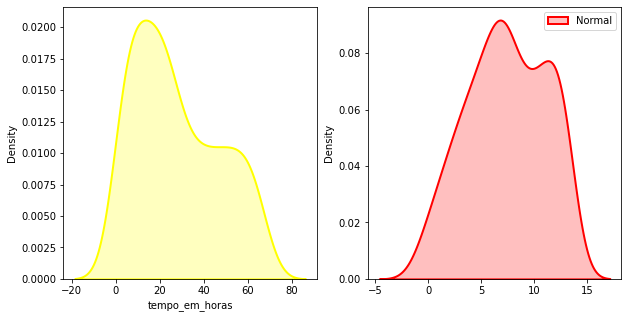

In [12]:
print("Transformação BOX-COX")

original_data = y1
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
fig, ax = plt.subplots(1, 2)
 
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="yellow", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="red", ax = ax[1])
 

plt.legend(loc = "upper right")

fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Valor de Lambda: {fitted_lambda}")
print(fitted_data)

In [15]:
print("Criação de novo modelo de regressão com y transformado")
X1T = df_mr.drop(['tempo_em_horas','tempo'],axis=1)
y1T = fitted_data
modelo1T = sm.OLS(y1T,sm.add_constant(X1T)).fit()
modelo1T.summary(title='Sumário do modelo para cálculo do tempo de carga')

Criação de novo modelo de regressão com y transformado


<class 'statsmodels.iolib.summary.Summary'>
"""
               Sumário do modelo para cálculo do tempo de carga               
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2708.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          5.04e-178
Time:                        10:15:19   Log-Likelihood:                -324.83
No. Observations:                 270   AIC:                             655.7
Df Residuals:                     267   BIC:                             666.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -30.3585      5.417     -5.604      0.000     -41.024     -19.693
tamanho_amostra   5.748e-05   9.57e-06      6.004      0.000    3.86e-05    7.63e-05
percentual_carga     0.1300      0.002     66.899      0.000       0.126       0.134
==============================================================================
Omnibus:                       63.208   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.828
Skew:                          -1.295   Prob(JB):                     3.85e-24
Kurtosis:                       4.697   Cond. No.                     6.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
import math
print("Previsão do tempo de carga após tranformação BOX_COX")
ypredT = modelo1T.params.const +  modelo1T.params.tamanho_amostra * 558114 + modelo1T.params.percentual_carga * 100
print('100% -- ','|ypredT -- ',ypredT,'|ypred -- ', math.pow((ypredT * (fitted_lambda)) + 1, 1/fitted_lambda),' |inv_boxcox() ',inv_boxcox(ypredT,fitted_lambda)) 

ypredT = modelo1T.params.const +  modelo1T.params.tamanho_amostra * 558114 + modelo1T.params.percentual_carga * 50
print('50%  -- ','|ypredT -- ',ypredT,'  |ypred -- ', math.pow((ypredT * (fitted_lambda)) + 1, 1/fitted_lambda),'|inv_boxcox() ',inv_boxcox(ypredT,fitted_lambda)) 


Previsão do tempo de carga após tranformação BOX_COX
100% --  |ypredT --  14.728165890631173 |ypred --  78.75003109396938  |inv_boxcox()  78.75003109396933
50%  --  |ypredT --  8.22633595370441   |ypred --  28.27877347424677 |inv_boxcox()  28.278773474246762
